In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import copy
from sklearn.ensemble import GradientBoostingRegressor

import time


In [71]:
df = pd.read_csv('data/housing.csv')

df.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()


,RM,LSTAT,PTRATIO,MEDV
0,0.520554,-1.125077,-1.525083,0.300640
1,0.281048,-0.537070,-0.339748,-0.004498
2,1.469245,-1.259357,-0.339748,1.661047
3,1.178417,-1.413427,0.086973,1.495764
4,1.410146,-1.075605,0.086973,1.851759


In [74]:
X = df_scaled.drop('MEDV', axis=1)
y = df_scaled['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





## Sklearn

In [75]:
start_time = time.time()

m = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3)

m.fit(X_train, y_train)

y_pred = m.predict(X_test)

end_time = time.time()

sklearn_time = end_time - start_time

sklearn_r2 = r2_score(y_test, y_pred)

print(f"Time taken: {sklearn_time} seconds")




Time taken: 0.9787037372589111 seconds


## Custom Implementation

In [76]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [77]:
from gradientboosting import GradientBoosting as CustomGB

start_time = time.time()
custom_gb = CustomGB(learning_rate=0.1, max_depth=3, loss_func=mean_squared_error)
custom_gb.fit(X_train, y_train, num_iterations=1000)

y_pred = custom_gb.predict(X_test) 

end_time = time.time()
custom_time = end_time - start_time

custom_r2 = r2_score(y_test, y_pred)

print(f"Time taken: {custom_time} seconds")
print(f"R2 score: {custom_r2}")


Time taken: 3.1286404132843018 seconds
R2 score: 0.8116425061602619


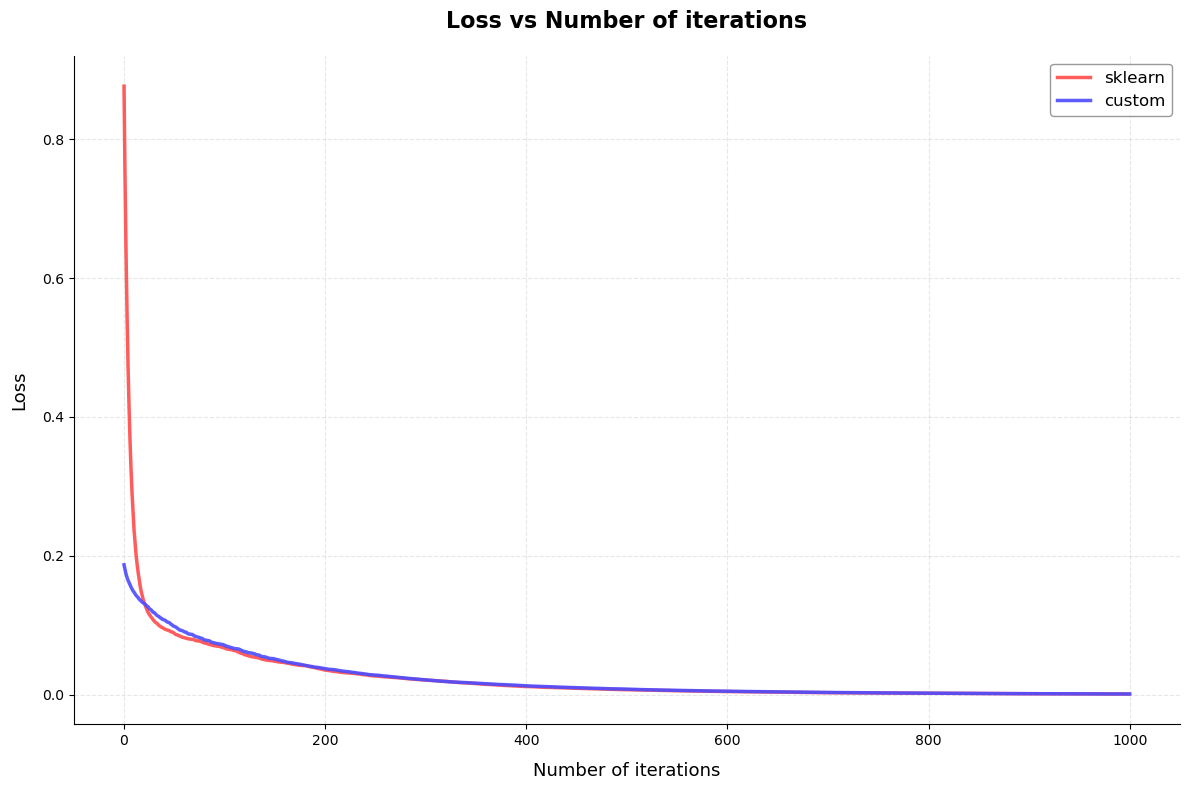

In [78]:
plt.figure(figsize=(12, 8))

# Plot with enhanced styling
plt.plot(m.train_score_, label="sklearn", color="#FF4B4B", linewidth=2.5, alpha=0.9)
plt.plot(custom_gb.losses, label="custom", color="#4B4BFF", linewidth=2.5, alpha=0.9)

# Enhanced legend and labels
plt.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='gray')
plt.xlabel("Number of iterations", fontsize=13, labelpad=10)
plt.ylabel("Loss", fontsize=13, labelpad=10)
plt.title("Loss vs Number of iterations", fontsize=16, pad=20, weight='bold')

# Grid and styling
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()


## Cross Validation

In [79]:
def cross_validation(model,X, y, num_folds=5):
    scores = []

    for _ in range(num_folds):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        m = copy.deepcopy(model)

        m.fit(X_train, y_train)

        y_pred = m.predict(X_test)

        scores.append(r2_score(y_test, y_pred))

    return scores


In [80]:
sklearn_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3)
custom_model = CustomGB(learning_rate=0.1, max_depth=3, loss_func=mean_squared_error)

num_folds = 10

scores = {
    "sklearn": cross_validation(sklearn_model,X, y, num_folds),
    "custom": cross_validation(custom_model, X, y, num_folds)
}


In [81]:
print(f"Average scores:\n sklearn: {np.mean(scores['sklearn'])}\n custom: {np.mean(scores['custom'])}")


Average scores:
 sklearn: 0.8037469348803287
 custom: 0.812915905537858


## Comparison

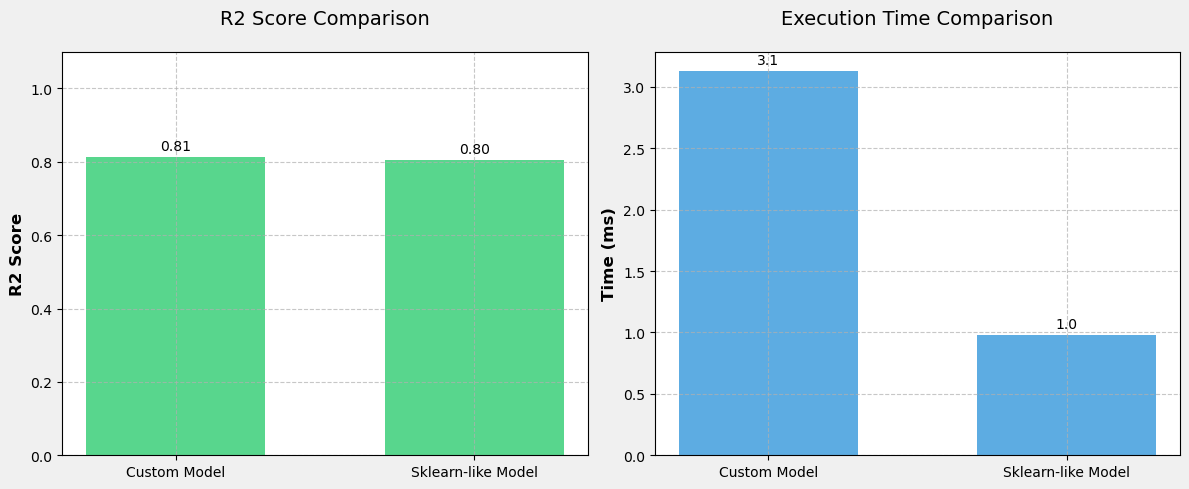

In [82]:
# Setup for plotting with modern style
plt.style.use('default')

# Data preparation
model_names = ['Custom Model', 'Sklearn-like Model']
r2_scores_plot = [np.mean(scores["custom"]), np.mean(scores["sklearn"])]
time_taken_plot = [custom_time, sklearn_time]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.patch.set_facecolor('#f0f0f0')

# Set positions for bars
x = np.arange(len(model_names))
width = 0.6

# Create R2 Score bars with modern styling
bars1 = ax1.bar(x, r2_scores_plot, width, color='#2ecc71', alpha=0.8)
ax1.set_ylabel('R2 Score', fontsize=12, fontweight='bold')
ax1.set_title('R2 Score Comparison', fontsize=14, pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, fontsize=10)
ax1.set_ylim(0, 1.1)
ax1.grid(True, linestyle='--', alpha=0.7)

# Create Time bars with modern styling
bars2 = ax2.bar(x, time_taken_plot, width, color='#3498db', alpha=0.8)
ax2.set_ylabel('Time (ms)', fontsize=12, fontweight='bold')
ax2.set_title('Execution Time Comparison', fontsize=14, pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add value labels with modern styling
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()